In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
boston_list = pd.read_csv('./boston/listings.csv')

# process data

In [195]:
choose_list = ['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count', 'host_total_listings_count',
'host_has_profile_pic','host_identity_verified', 'zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type',
'minimum_nights','maximum_nights','instant_bookable','cancellation_policy','price']

In [4]:
boston_list['price'] = boston_list['price'].apply(lambda x : float(x.replace('$','').replace(',','')))

In [5]:
boston_list['host_acceptance_rate'] = boston_list['host_acceptance_rate'].astype('str')
boston_list['host_acceptance_rate'] = boston_list['host_acceptance_rate'].apply(lambda x : x.replace("%", ''))
boston_list['host_acceptance_rate'] = boston_list['host_acceptance_rate'].astype('float')



In [123]:
boston_list['host_response_rate'] = boston_list['host_response_rate'].astype('str')
boston_list['host_response_rate'] = boston_list['host_response_rate'].apply(lambda x : x.replace("%", ''))
boston_list['host_response_rate'] = boston_list['host_response_rate'].astype('float')

In [167]:
def processData(data,drop=True):
    """drop null or fill mean

    Keyword arguments:
    data -- the data that need to be processed
    drop -- If it equals True drop rows that contain NAN value,if false fill NAN value with mean value  (default True)
    """
    num_vars = data.select_dtypes(include=['float', 'int64', 'float64','uint8']).columns
    data = data[num_vars]
    if drop:
        data.dropna(inplace=True)
    else:
        for var in num_vars:
            data[var].fillna(data[var].mean(),inplace=True)
    return data

In [117]:

def addStr(data, columns):
    """add categories feature
    Keyword arguments:
    data - basic data
    columns - column's name that need to transform into one hot and add to basic data
    """
    data = pd.concat([data.drop(columns, axis=1), pd.get_dummies(data[columns], prefix=columns, prefix_sep='_', drop_first=True)], axis=1)
    return data

## model

In [191]:
X_pred = boston_list[choose_list]
#X_pred.drop(['host_listings_count', 'host_total_listings_count'],axis=1,inplace=True)
X_pred = addStr(X_pred,'cancellation_policy')
X_pred = addStr(X_pred,'bed_type')
X_pred = addStr(X_pred,'instant_bookable')
X_pred = processData(X_pred,drop=True)
X = X_pred.drop('price',axis=1)
y= X_pred['price']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [194]:
# train model and get score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train,y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)

0.45552955440554


In [166]:
def coef_weights(coefficients, X_train):
    """Train linear model
    Keyword arguments:
    coefficients: estimated coefficients for the linear regression problem
    X_train: training data
    """
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
12,cancellation_policy_super_strict_30,1.596933e+02,1.596933e+02
16,bed_type_Real Bed,3.667953e+01,3.667953e+01
13,bed_type_Couch,3.343300e+01,3.343300e+01
4,accommodates,2.463599e+01,2.463599e+01
6,bedrooms,1.911241e+01,1.911241e+01
5,bathrooms,1.899179e+01,1.899179e+01
17,instant_bookable_t,-1.836411e+01,1.836411e+01
14,bed_type_Futon,-1.301845e+01,1.301845e+01
11,cancellation_policy_strict,1.170523e+01,1.170523e+01
10,cancellation_policy_moderate,1.075089e+01,1.075089e+01


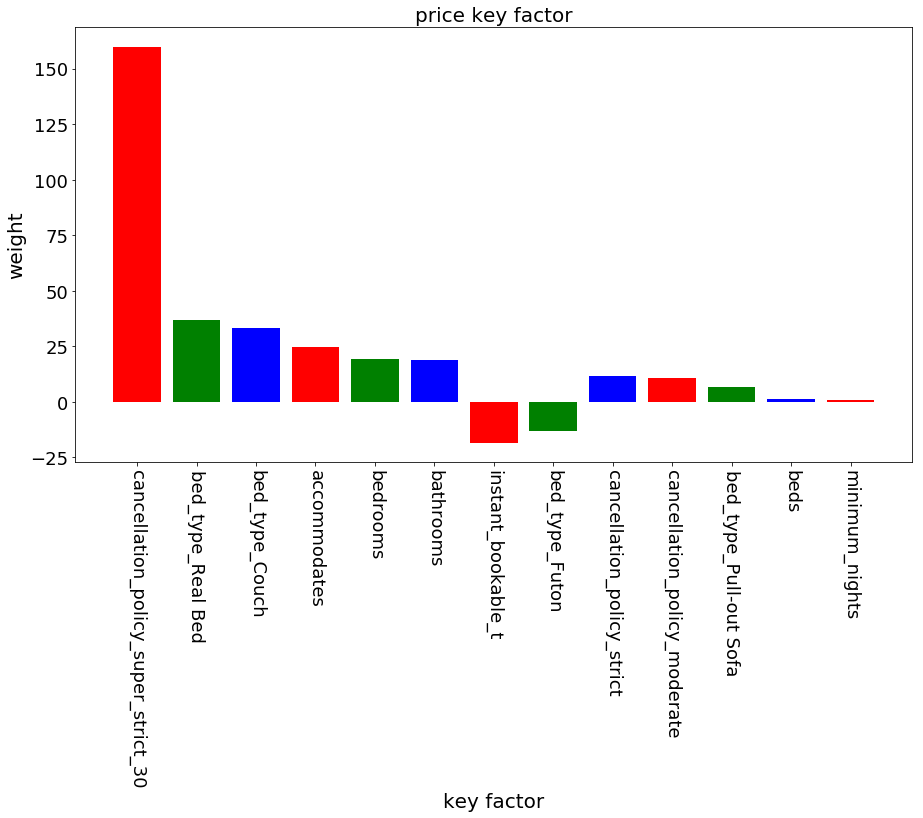

In [216]:
plt.figure(figsize=(15,8))
# select top 13 important features
name_list = coef_df['est_int'].values[:13]
num_list = coef_df['coefs'].values[:13]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.title('price key factor', fontsize=20)
plt.xlabel('key factor', fontsize=20)
plt.ylabel('weight', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=270)
plt.show()